# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

Here is verbiage, that better reflects the assignment description:
#### · Use of four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
#### · Clear identification of evaluation metrics
#### · Appropriate interpretation of evaluation metrics
#### · Clear rationale for use of the evaluation metrics
#### · Appropriate comparison of the four models



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?



#### Marketing Campaigns represented in the data
#### - The telephone, with a human agent as the interlocutor, was the dominant marketing channel. 
#### - although sometimes with an auxiliary use of the Internet online banking channel (e.g. by showing information to specific targeted client).

#### No. of Marketing campaigns was quoted in the article below: 17 Marketing campaigns
- "The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate)."

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [959]:
import pandas as pd
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
warnings.filterwarnings('ignore')

# From Scikit Learn
from sklearn import preprocessing, decomposition, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from astropy.table import Table, Column
# Set DEBUG = True to produce debug results
DEBUG = False


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [770]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [771]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [772]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see from above that out of the 21 columns present in the dataset, there are 10 Numerical datatypes and 11 Categorical ones.

Numerical/Quantitative DataTypes: Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. ex: age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed

Categorical/Qualitative DataTypes: Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. ex: job,marital,education,default,housing,loan,poutcome,contact,month,day_of_week,y

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [774]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Using Describe helps us to understand the data in much better sense, we can now see the range, means, standard deviations, max-min and percentiles of the data, which helps us make better sense of the data.

As we can see from above that the data ranges of the columns are vastly different (ie: nr.employed mean 5167.035911 and emp.var.rate mean 0.081886). So to mprove the quality of our data we need to normalize it.

In [869]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [775]:
df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [776]:
# We need to check null values in dataset
df.isnull().sum()
#isnull(): This function takes a scalar or array-like object and indicates whether values are missing. 
#And we can see that there are no Null values in our dataset.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [777]:
# We need to check NaN values in dataset
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [778]:
# To check duplicated values 
print(df.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


There are 12 Duplicate entries in our Dataset, So we need to delete the duplicates for better understanding and predictions.

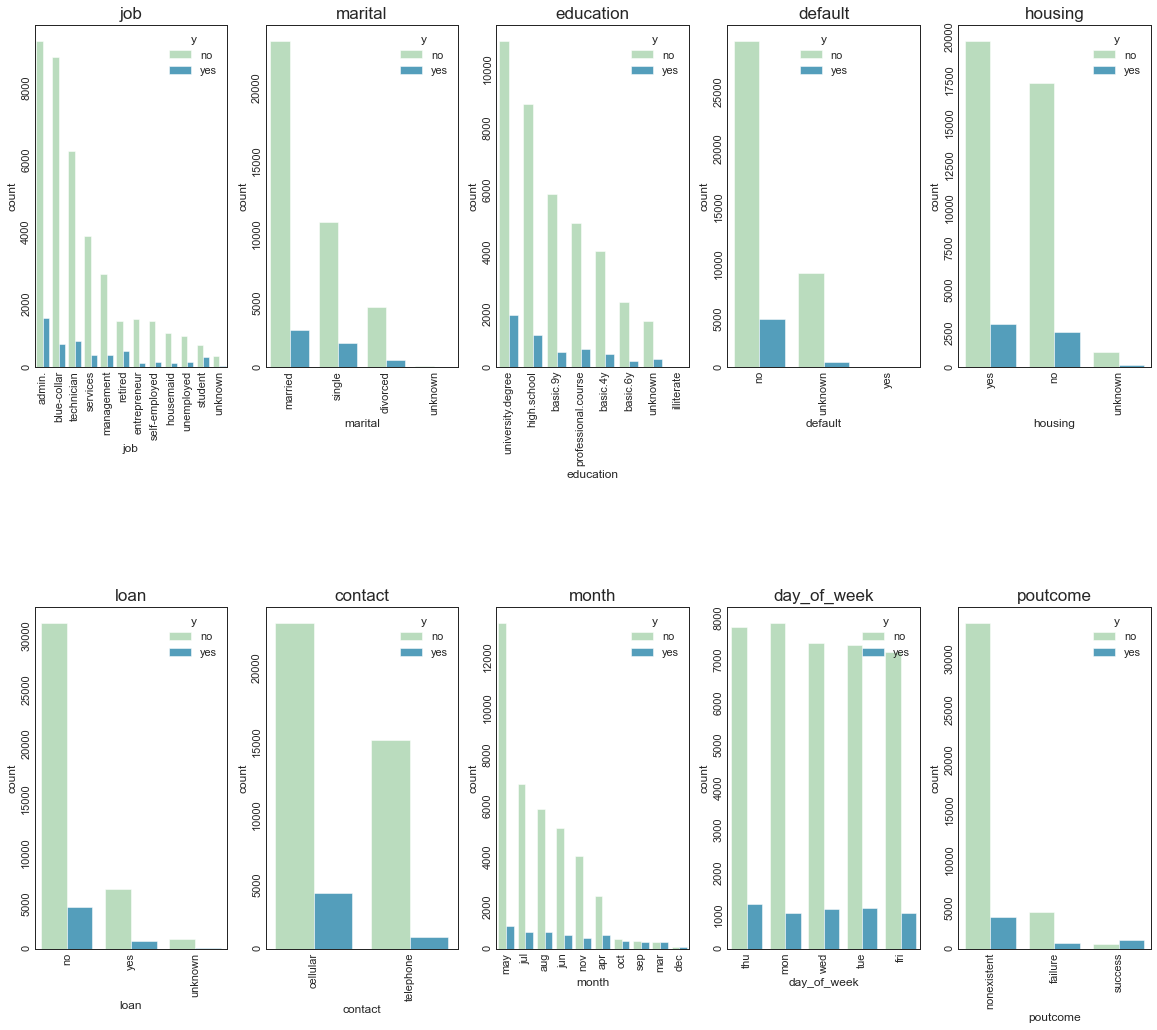

In [1012]:
fig, ax = plt.subplots(2,5, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

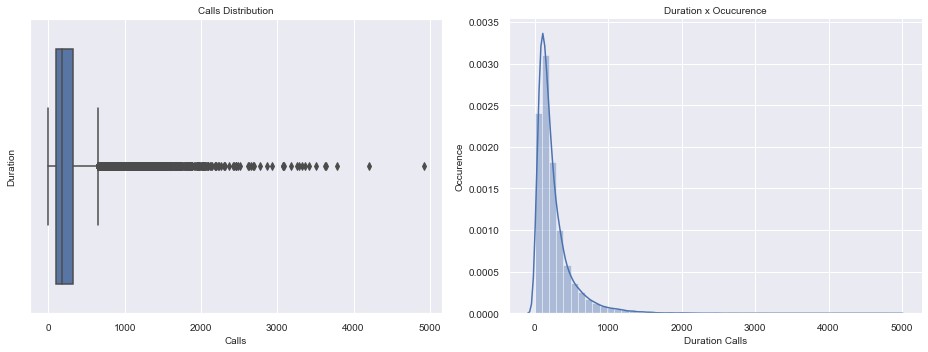

In [780]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

#### duration is different from age, Age has 78 values and Duration has 1544 different values, mostly focused around less than 2000 calls happening across frequencies of 1 to 0.0030.

In [781]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

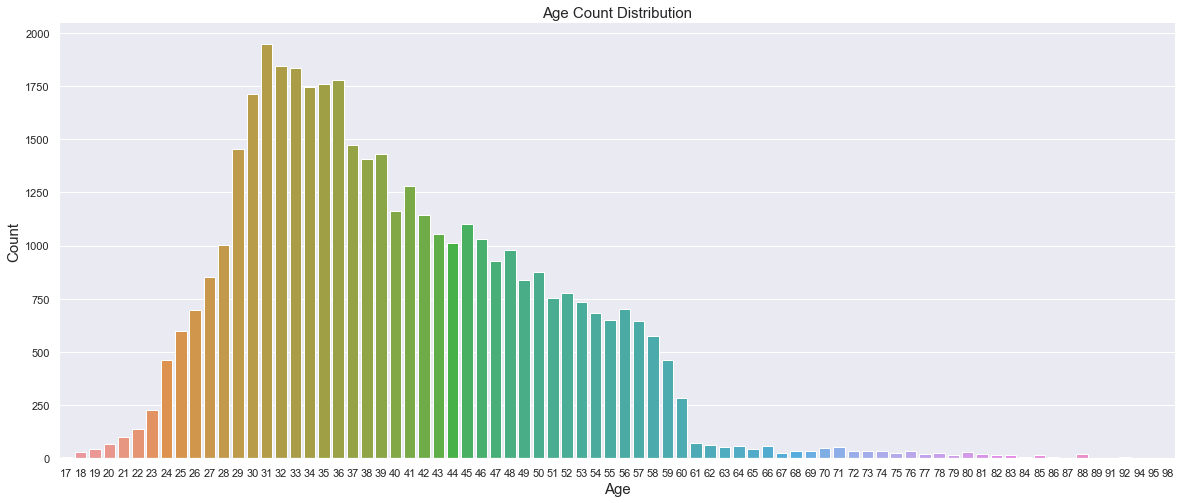

In [782]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

#### Understanding the age distribution of the client is important for reviewing the type of campaigns to launch even for term deposits based on the mortality of the customer.

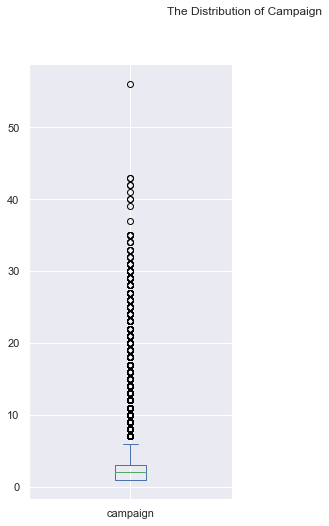

In [783]:
df[['campaign']].plot(kind = 'box', 
                                              figsize = (8,8),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaign')
plt.show()

#### Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal.

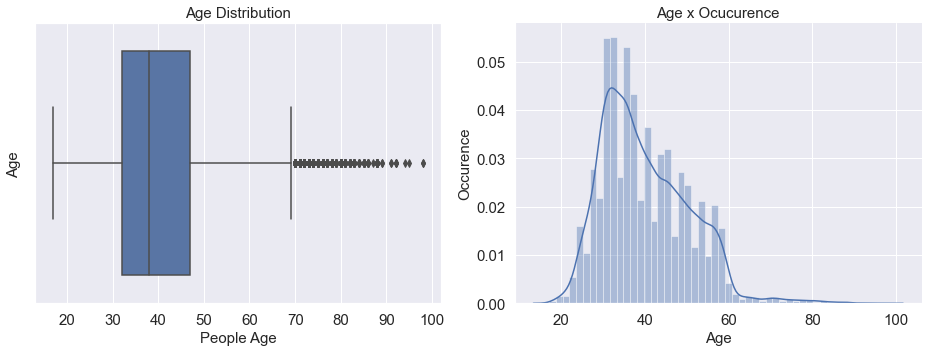

In [784]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

#### Due to almost high dispersion and just looking at this this graph we cannot conclude 
#### - if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages 
#### - and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

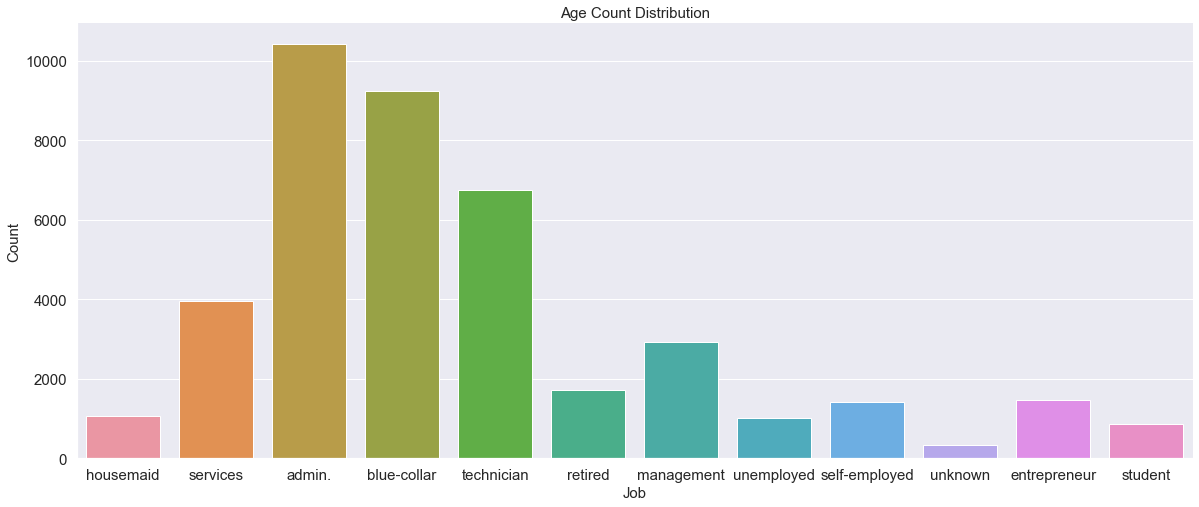

In [785]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#### mostly blue collar workers and admin as well as tecnicians dominate the clientele at this bank

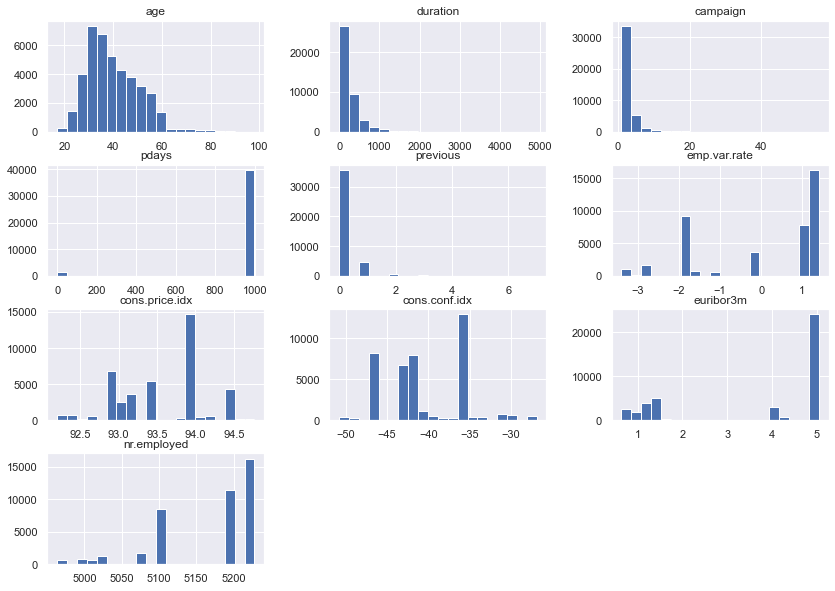

In [786]:
df.hist(bins=20, figsize=(14,10))
plt.show()

### Dealing with Missing Values

In [787]:
print(df.default.unique().tolist())

['no', 'unknown', 'yes']


In [870]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [871]:
# Lets count numbers of row for 'y' type
df.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

In [790]:
df.shape[0]

41188

In [872]:
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


Understanding our dependent variable (or) output variable. 'Y' is a categorical variable with either Yes or No as value.

Suggesting if the client subscribed to a term deposit or not.

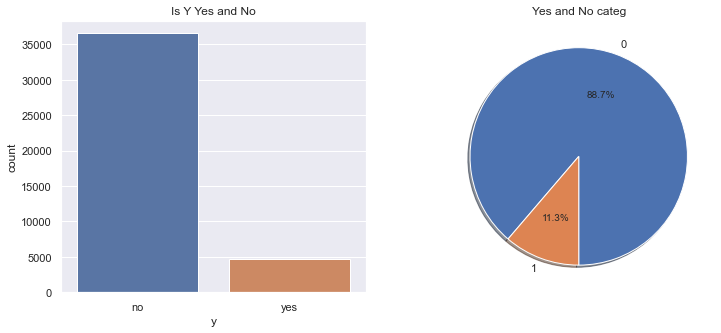

In [792]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=df)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

In [793]:
df.groupby('contact').count()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
contact,,,,,,,,,,,,,,,,,,,,
cellular,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144,26144
telephone,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044


In [794]:
df.groupby('poutcome').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
poutcome,,,,,,,,,,,,,,,,,,,,
failure,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252
nonexistent,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563
success,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373


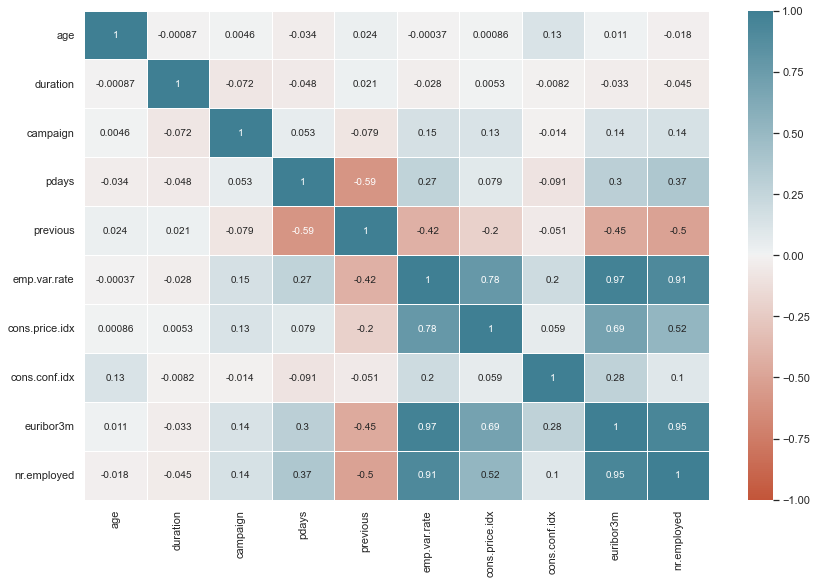

In [873]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

#### Duration highly affects the output target (e.g., if duration=0 then y=‘no’).
#### Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#### Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

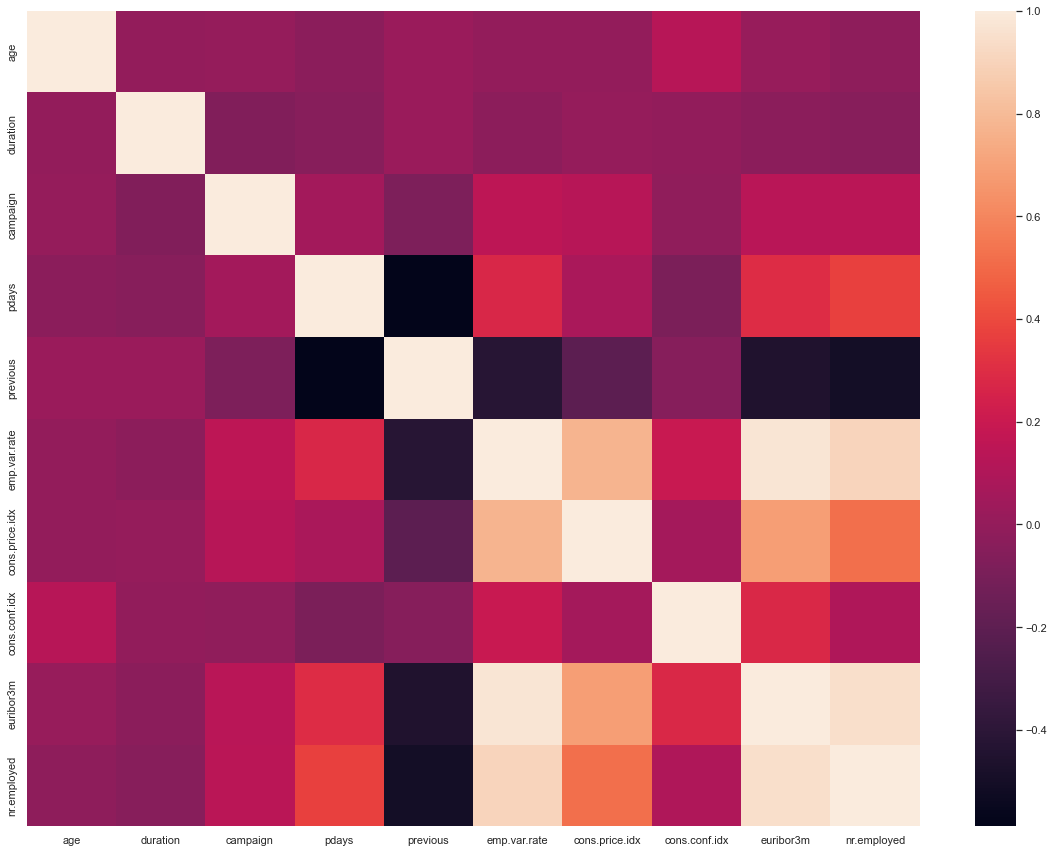

In [796]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor)
plt.show()

In [797]:
#checking the correlation between all the features in the data
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [798]:
df.isna().sum().sum()

0

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Business Objective of the task:
#### -  find a model that can explain success of a contact, i.e. if the client subscribes the deposit. 
####  Such model can increase campaign efficiency by :
##### -- identifying the main characteristics that affect success, 
##### -- helping in a better management of the available resources (e.g. human effort, phone calls, time) 
##### -- and selection of a high quality 
##### -- and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [799]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### build bank client grouping to tag all client properties

In [874]:
bank_client =df.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


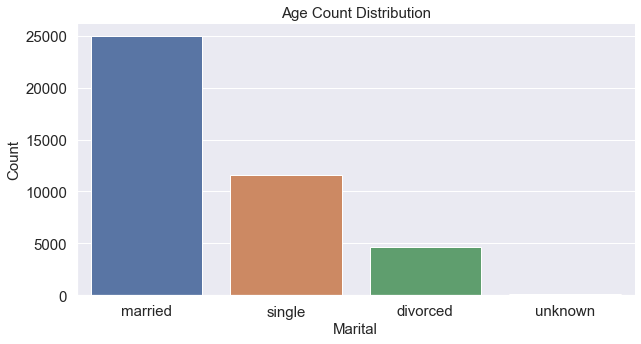

In [875]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

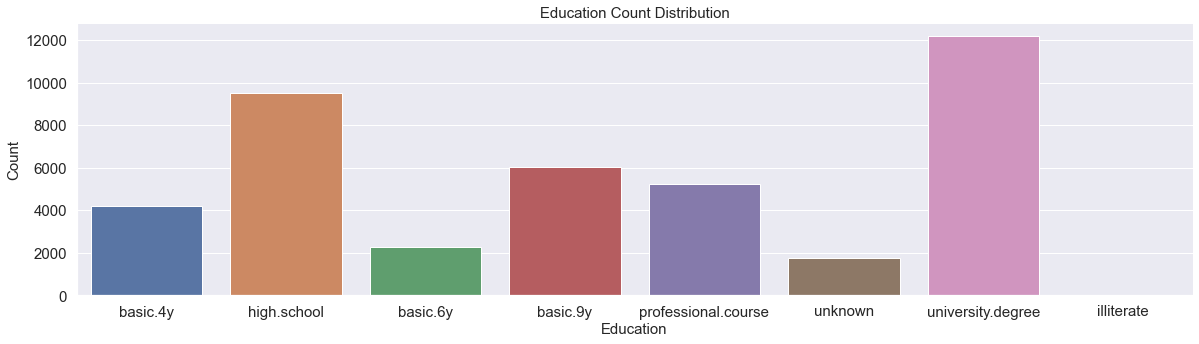

In [876]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### BANK CLIENTS CONCLUSION
#### The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

##### Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones
#### its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.


#### Building social economic group of variables -  bank_se

In [803]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [804]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [805]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [806]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


Building social economic group of variables - bank_o

In [807]:
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [808]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [809]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [810]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [811]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [812]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [813]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [814]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [815]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [816]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [817]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [818]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [819]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [820]:
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


#### Model definition

In [821]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [822]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 0)

# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(bank_final, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [823]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
29321,2,7,0,3,0,2,0,1,0,0,4,-1.8,93.075,-47.1,1.405,5099.1,3,999,0,1
23925,2,10,1,6,0,2,0,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,2,999,0,1
39148,1,0,0,5,0,2,0,0,5,3,3,-1.8,93.369,-34.8,0.655,5008.7,2,999,1,2
12078,1,1,2,2,0,2,0,1,4,0,1,1.4,94.465,-41.8,4.947,5228.1,1,999,0,1
41021,1,10,2,3,0,2,0,0,8,0,2,-1.1,94.601,-49.5,1.029,4963.6,2,999,0,1


In [824]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [825]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Our classifier should beat the competition by having the following qualities:
#### - high training accuracy
#### - low false positive value
#### - high test accuracy
#### - The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.


#### KNN Neighbor: Classifier, Confusion Matrix and Cross Validation 

k=1 87.92 (+/- 0.60)
k=2 89.54 (+/- 0.51)
k=3 89.48 (+/- 0.51)
k=4 89.92 (+/- 0.51)
k=5 89.85 (+/- 0.51)
k=6 90.09 (+/- 0.46)
k=7 90.13 (+/- 0.46)
k=8 90.17 (+/- 0.45)
k=9 90.32 (+/- 0.42)
k=10 90.32 (+/- 0.39)
k=11 90.36 (+/- 0.43)
k=12 90.39 (+/- 0.39)
k=13 90.44 (+/- 0.46)
k=14 90.42 (+/- 0.47)
k=15 90.47 (+/- 0.52)
k=16 90.39 (+/- 0.49)
k=17 90.46 (+/- 0.48)
k=18 90.47 (+/- 0.49)
k=19 90.51 (+/- 0.54)
k=20 90.45 (+/- 0.52)
k=21 90.50 (+/- 0.54)
k=22 90.46 (+/- 0.53)
k=23 90.49 (+/- 0.57)
k=24 90.41 (+/- 0.56)
k=25 90.53 (+/- 0.53)
The optimal number of neighbors is 24 with 90.5%


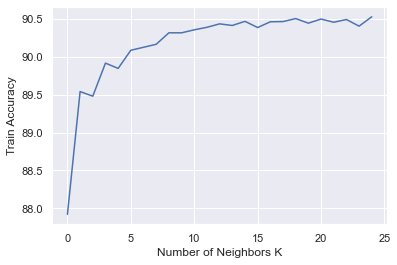

In [827]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()



In [829]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[7181  138]
 [ 641  278]]
91.0


In [830]:
#KNN train model. Call up my model and name it clf
clf_knn = KNeighborsClassifier(n_neighbors=18, n_jobs=-1, algorithm='auto', weights='uniform')
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_knn)
#Fit clf to the training data
clf_knn = clf_knn.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_knn = clf_knn.predict(features_test)



KNeighborsClassifier(n_jobs=-1, n_neighbors=18)


In [831]:
acc_knn = accuracy_score(target_test, target_predicted_knn)
prec_knn = precision_score(target_test, target_predicted_knn)
recall_knn = recall_score(target_test, target_predicted_knn)
f1_knn = f1_score(target_test, target_predicted_knn)
cm_knn = confusion_matrix(target_test, target_predicted_knn)
print("KNN Accuracy Score", acc_knn)
print(classification_report(target_test, target_predicted_knn))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_knn))

KNN Accuracy Score 0.9047098810390871
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7319
           1       0.67      0.29      0.41       919

    accuracy                           0.90      8238
   macro avg       0.79      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238



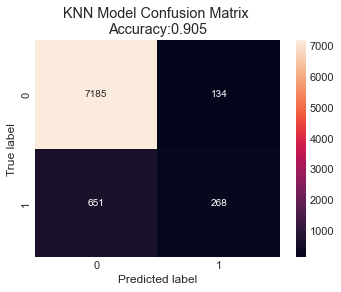

In [1010]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('KNN Model Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Support Vector Model: Classifier, Confusion Matrix and cross validation

In [833]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6719  600]
 [ 590  329]]
86.0


In [834]:
from sklearn.svm import SVC
# Support Vector train model. Call up my model and name it clf
clf_svc = SVC(probability=True, gamma='auto', max_iter=-1)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_svc)
#Fit clf to the training data
clf_svc = clf_svc.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_svc = clf_svc.predict(features_test)


SVC(gamma='auto', probability=True)


In [835]:
acc_svc = accuracy_score(target_test, target_predicted_svc)
prec_svc = precision_score(target_test, target_predicted_svc)
recall_svc = recall_score(target_test, target_predicted_svc)
f1_svc = f1_score(target_test, target_predicted_svc)
cm_svc = confusion_matrix(target_test, target_predicted_svc)
print("SVC Accuracy Score", acc_svc)
print(classification_report(target_test, target_predicted_svc))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_svc))

SVC Accuracy Score 0.8998543335761107
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.67      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.88      8238



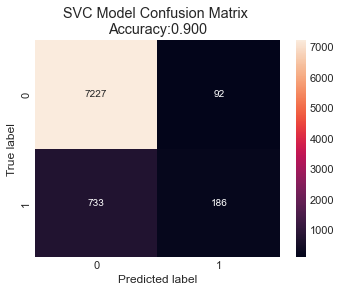

In [1009]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title('SVC Model Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_svc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ROC AUC: 0.894


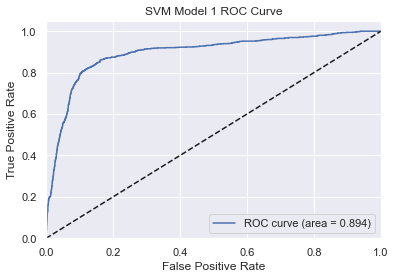

In [837]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, clf_svc.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc_svc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_svc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Model 1 ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree :Classifier, Confusion Matrix and cross validation

In [838]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6840  479]
 [ 467  452]]
89.0


In [839]:
## decision tree model 1
train_results = []
test_results = []
# search for an optimal value of max_depth for decision tree
k_range = list(range(1,20))
k_scores = []
for k in k_range:
    dt = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, features_train, target_train, cv=10, scoring='recall', n_jobs=-1)
    k_scores.append(scores.mean())
    # Code for plotting results
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(features_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
if DEBUG:
    print(k_scores)
    # process stuff


In [840]:
if DEBUG:
    scores = pd.DataFrame(k_scores)
    print(scores)

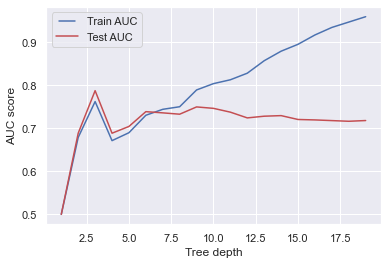

In [841]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(k_range, train_results, 'b', label="Train AUC")
line2, = plt.plot(k_range, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [842]:
#Decision Tree train model. Call up my model and name it clf 
clf_dt = tree.DecisionTreeClassifier(max_depth=6)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(max_depth=6)


In [843]:
acc_dt = accuracy_score(target_test, target_predicted_dt)
prec_dt = precision_score(target_test, target_predicted_dt)
recall_dt = recall_score(target_test, target_predicted_dt)
f1_dt = f1_score(target_test, target_predicted_dt)
cm_dt = confusion_matrix(target_test, target_predicted_dt)
print("DT Accuracy Score", acc_dt)
print(classification_report(target_test, target_predicted_dt))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9153920854576354
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.65      0.51      0.57       919

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238



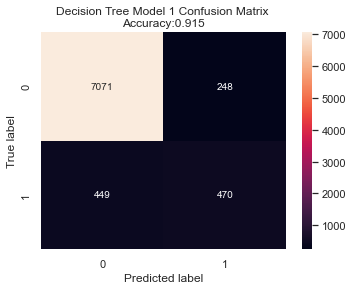

In [844]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Decision Tree Model 1 Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_dt))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [845]:
#verify DT with Cross Validation
scores_dt = cross_val_score(clf_dt, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_dt)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))

Cross Validation Score for each K [0.90743551 0.90986343 0.90409712 0.90986343 0.90986343 0.907739
 0.90349014 0.91047041 0.91168437 0.90834598]
Accuracy: 0.91 (+/- 0.01)


ROC AUC: 0.929


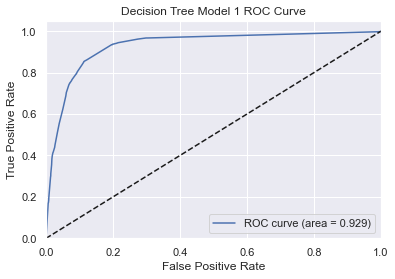

In [846]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, clf_dt.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc_dt = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_dt)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model 1 ROC Curve')
plt.legend(loc="lower right")
plt.show()

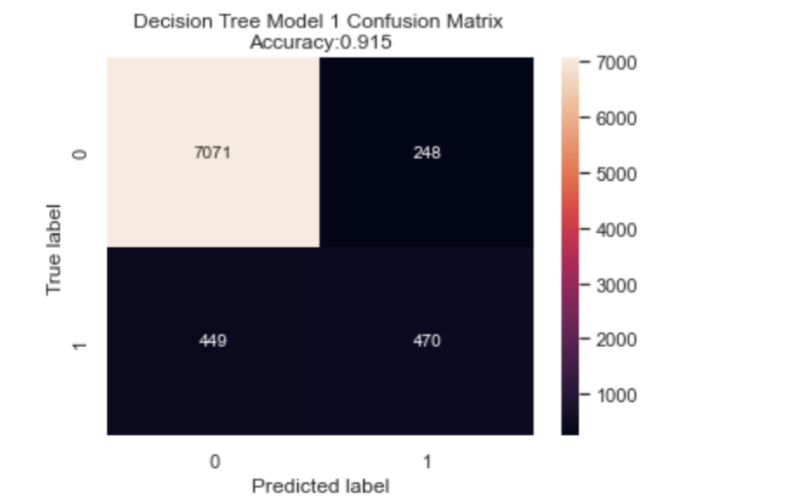  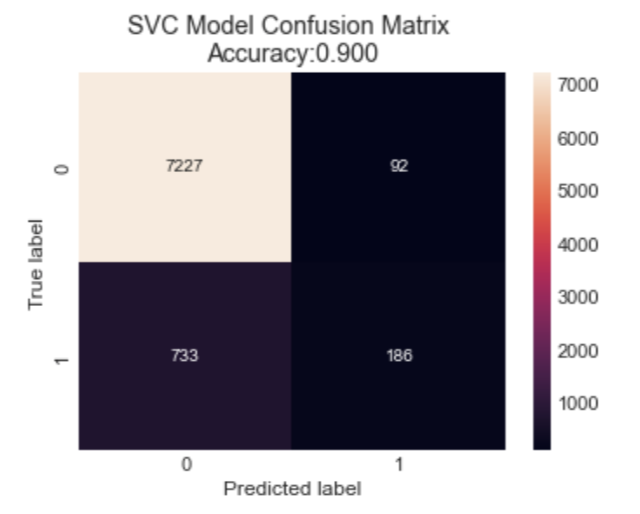 
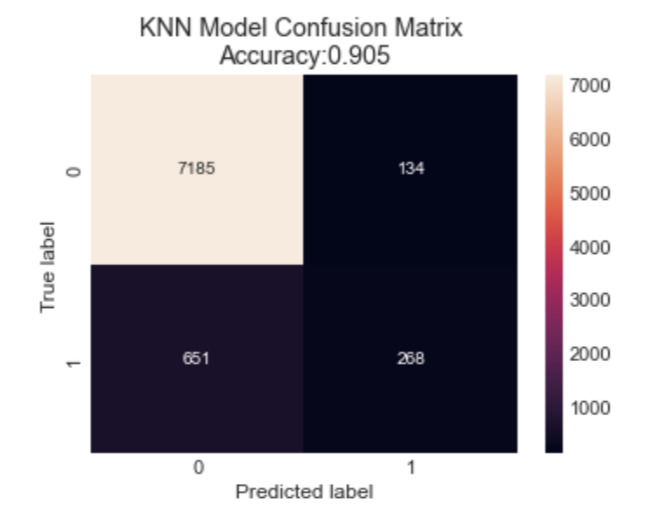  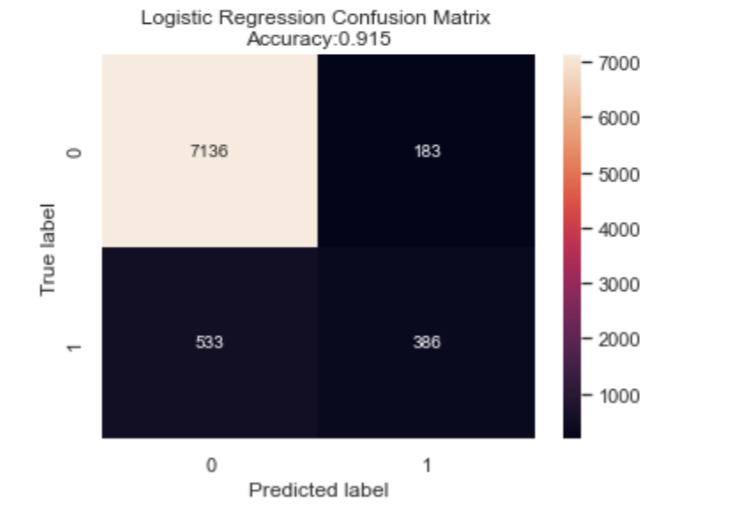

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

#### Logistic Regression :Classifier, Confusion Matrix and cross validation

In [854]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
cm_log=confusion_matrix(y_test, logpred)
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[7136  183]
 [ 533  386]]
91.0


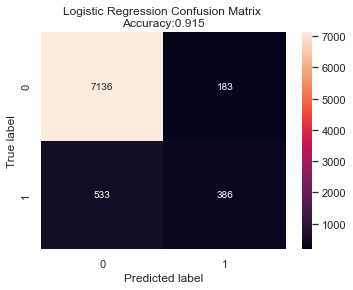

In [855]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_dt))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [667]:
models = pd.DataFrame({
                'Models': ['Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model'],
                'Score':  [DTREECV, SVCCV, KNNCV, LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Logistic Model,0.906100
2,K-Near Neighbors,0.902701
1,Support Vector Machine,0.897511
0,Decision Tree Classifier,0.879514


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

3.460102016106248e-05
3.664399264380336e-05
4.030601121485233e-05
4.963300307281315e-05


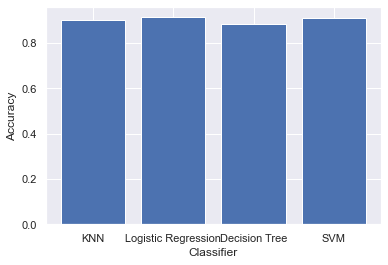

In [740]:
# Initialize the classifiers
from timeit import default_timer as timer

knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
dtree = DecisionTreeClassifier()
svm = SVC(kernel='linear', C=1)

# Train the classifiers
knn.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
knn_train=(end - start)

logreg.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
log_train=(end - start)

dtree.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
dtree_train=(end - start)

svm.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
svm_train=(end - start)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for each classifier
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_dtree = accuracy_score(y_test, y_pred_dtree)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Plot the accuracy of each classifier
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [acc_knn, acc_logreg, acc_dtree, acc_svm]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

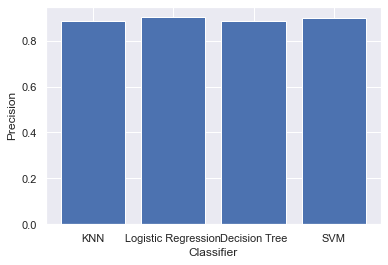

In [697]:
# Calculate precision for each classifier
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Plot the precision of each classifier
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
precision = [precision_knn, precision_logreg, precision_dtree, precision_svm]
plt.bar(classifiers, precision)
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.show()

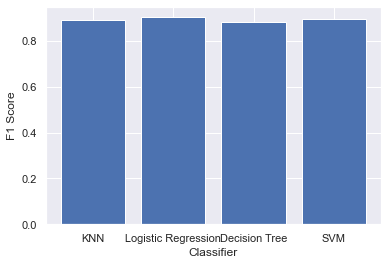

In [699]:
# Calculate F1 score for each classifier
from sklearn.metrics import f1_score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Plot the F1 score of each classifier
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
f1 = [f1_knn, f1_logreg, f1_dtree, f1_svm]
plt.bar(classifiers, f1)
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.show()

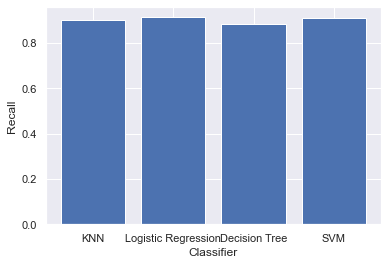

In [698]:
# Calculate recall for each classifier
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Plot the recall of each classifier
classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
recall = [recall_knn, recall_logreg, recall_dtree, recall_svm]
plt.bar(classifiers, recall)
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.show()

In [ ]:
t5 = Table()
t5[''] = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
t5['Accuracy Score'] = [round(acc_knn,4),round(acc_knn1,4),round(acc_knn2,4)]
t5['Precision'] = [round(prec_knn,4),round(prec_knn1,4),round(prec_knn2,4)]
t5['Recall'] = [round(recall_knn,4),round(recall_knn1,4),round(recall_knn2,4)]
t5['F1 Score'] = [round(f1_knn,4),round(f1_knn1,4),round(f1_knn2,4)]
t5['ROC AUC'] = [round(roc_auc_knn,4),round(roc_auc_knn1,4),round(roc_auc_knn2,4)]
t5

ROC AUC: 0.908


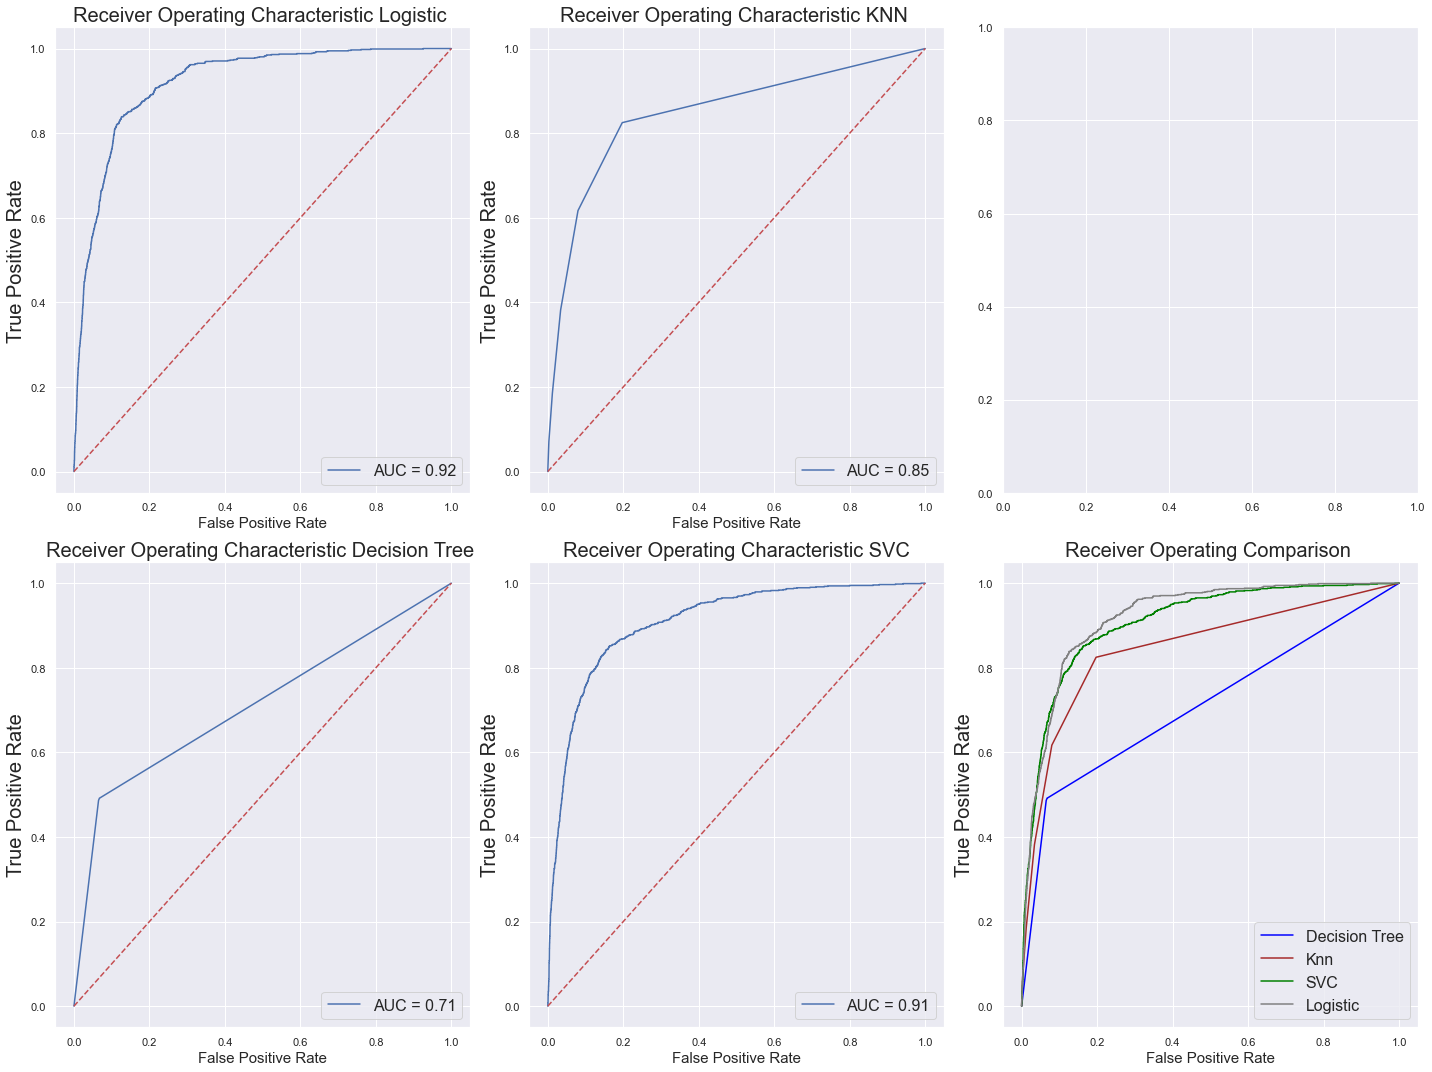

In [707]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#SVM ---------------------
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, clf_svc.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc_svc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_svc)
 
# Plot of a ROC curve for a specific class

ax_arr[1,1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic SVC',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fpr, tpr, 'b', label = 'SVC', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 


### ANALYZING THE RESULTS
#### So now we have to decide which one is the best model, and we have two types of wrong values:

#### 1. False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
#### 2. False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
#### In my opinion:

#### The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings
#### The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
#### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.

### Therefore looking at the model with the lowest false Positive at 433 is Decision Tree Model.


In [749]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'KNN',
                                   'Decision Tree',
                                   'SVC'],
                         'Training Time (secs)': [log_train*100000,
                                           knn_train*100000,
                                           dtree_train*100000,
                                           svm_train*100000],
                          'Train Accuracy': [acc_logreg,
                                           acc_knn,
                                           acc_dtree,
                                           acc_svc],
                          'Test Accuracy': [f1_logreg,
                                           f1_knn,
                                           f1_dtree,
                                           f1_svc
                                           ]})
acc_table = acc_table.sort_values(by='Train Accuracy', ascending=False)
acc_table.style.background_gradient(cmap='Blues')

,Model,Training Time (secs),Train Accuracy,Test Accuracy
0,Logistic Regression,3.664399,0.912843,0.903875
3,SVC,4.963300,0.909444,0.478322
1,KNN,3.460102,0.900825,0.891469
2,Decision Tree,4.030601,0.882739,0.884939


#### Conclusion that the Logistic regression shows the best Train and Test Accuracy combined with the least training time allows this model to perform well sin predictions.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### More feature engineering and exploration : handling outliers
#### start a new data frame bank_copy to show improvement with new features incorporated

Text(0.5, 1.0, 'No of employees')

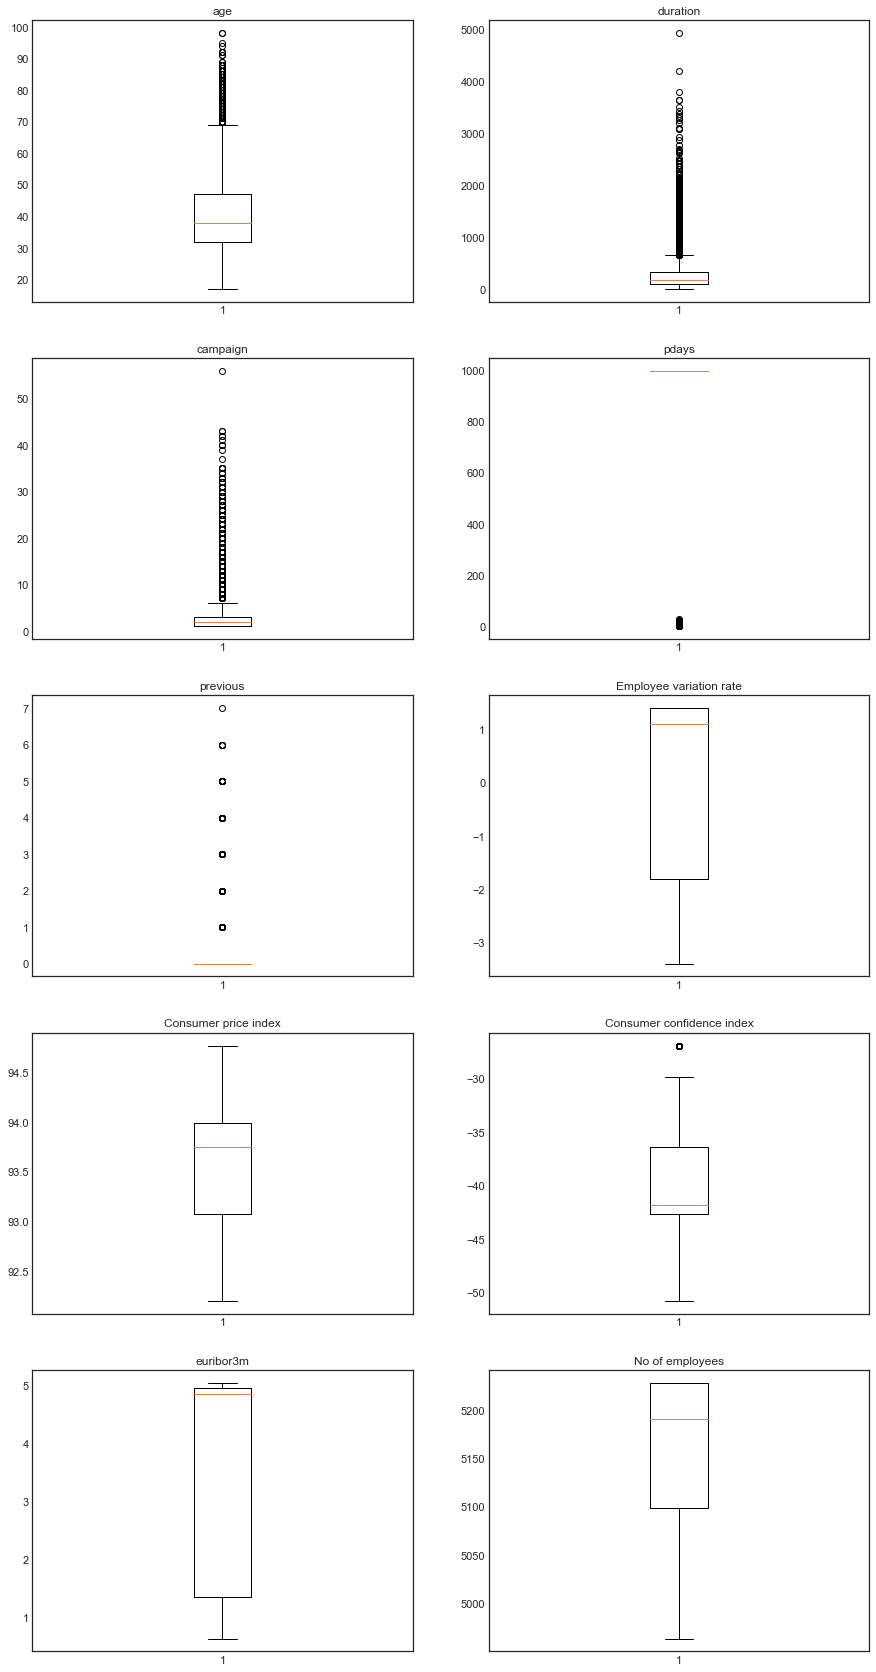

In [877]:
bank_copy=df.copy()
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [878]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

Text(0.5, 1.0, 'campaign')

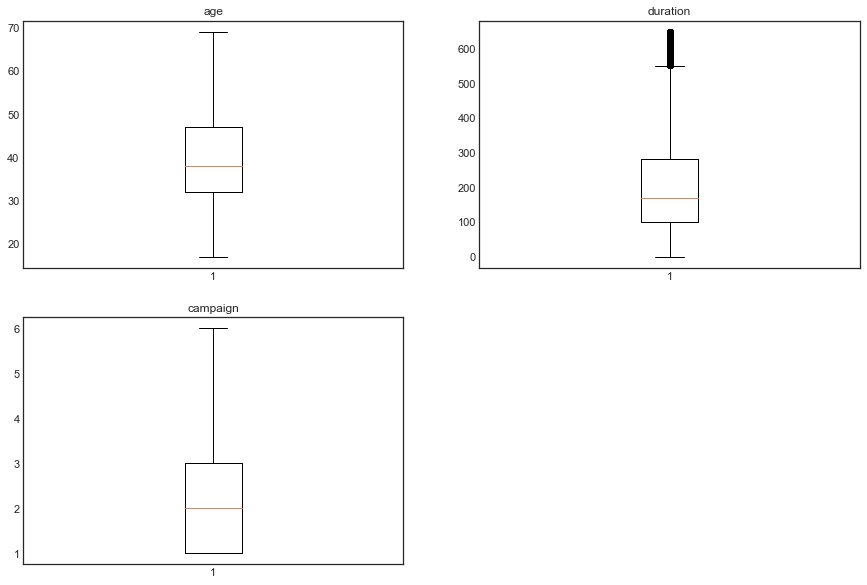

In [879]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

Now that we have removed outliers, we can proceed for more feature engineering techniques.

### Education- category clubbing¶
### Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school'

In [881]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

In [882]:
## Encoding - Month and Day of week
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [883]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [884]:
## Encoding 999 in pdays as 0
## Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [885]:
bank_features['pdays'].value_counts()

0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

#### Ordinal Number Encoding
#### Here we are gonna encode the features which has yes,no and unknown. We'll assign yes:1,no:0 and unknown:-1

In [887]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [888]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [890]:
bank_features.loc[:,['housing','default','loan','y']].head()
## We have encoded the yes/no features with hard encoding

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


#### Frequency Encoding

In [893]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [894]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [895]:
bank_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


#### Target Guided Ordinal Encoding
##### Lets encode marital feature based on the target 'y' . First let's find the mean of target with respect to marital feature

In [896]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [897]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [898]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [899]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [900]:
bank_features.marital_ordinal.value_counts()

1    21506
2    10086
0     3907
3       62
Name: marital_ordinal, dtype: int64

#### Standardization of numerical variables

In [903]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [904]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [905]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [906]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()
## We have scaled our numerical features as you can see from the head.

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,899,10688,0,0,0,5,2,0,1,1,...,1.694643,0.383434,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
1,3456,8287,-1,0,0,5,2,0,1,1,...,1.797965,-0.413575,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
2,3456,8287,0,1,0,5,2,0,1,1,...,-0.268482,0.134369,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
3,9110,10688,0,0,0,5,2,0,1,1,...,0.041485,-0.399342,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
4,3456,8287,0,0,1,5,2,0,1,1,...,1.694643,0.710777,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002


#### Feature Selection with new engineered features
 #### feature importances and prune our features to make our model perform well.

In [911]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

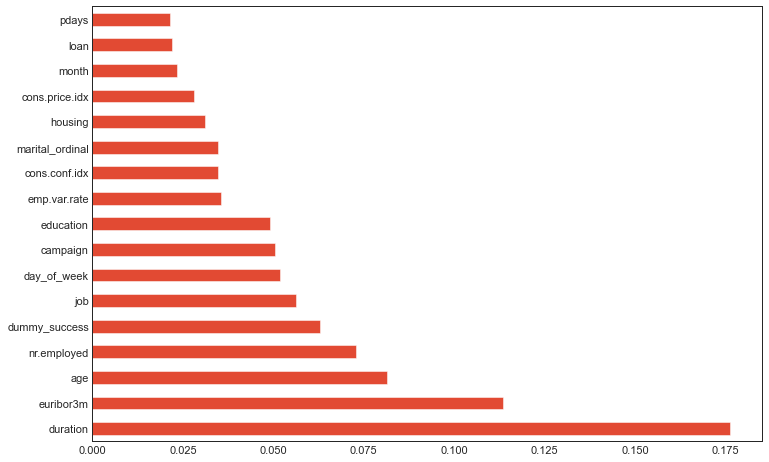

In [912]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

#### we can see the coeff is highest in the following input variables:
#### duration
#### euribor3m
#### age
#### nr.employed

#### Observing the results and the exploratory data analysis, the most important features which the bank should focus on to attract more customers to buy term deposit are:

#### 1.Duration being one of the most influential factors,i.e. the higher the call duration the higher the chances of a sale. So the bank should focus on enhancing the quality of calls by building a rapport with the customers, decreasing wait time, checking in with the customers, and most importantly take feedback from the customers.

#### 2.Euribo3 is indicative of the trend that the higher interest rates attract more customers. So there are two things which the bank can pursue which are as follows: -Target the age group which is liable to get higher interest rates (4.5-5) particularly. -Increase the marketing campaign when the interest rates are higher, which can help in bringing more clients on board with the term deposits.

#### 3. nr.employed shows employed trend indicates that more number of employees leads to more number of customers, which makes sense because if there are more employees, more leads can be targeted, proper followups and check-ins can be done. On the other hand, customer satisfaction could be achieved by creating a dedicated after-sales team. So, the bank should focus on hiring more people.

### Train and Test Split (80:20)
### Let's drop the required features and split the data into train and test

In [913]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


In [916]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8782081340900703
Decision Tree Test Accuracy: 0.6372913815910768
KNN Test Accuracy: 0.8746929484882704
SVC Test Accuracy: 0.9188718011316903


### Logistic regression with Hyperparameter tuning with GridSearchCV
#### Let's fit the model in logistic regression with parameter tuning and figure out the accuracy of our model

In [941]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf','SVC')})

clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/Users/kelvinchoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)
The mean accuracy of the model is: 0.9246450161675804


In [944]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6399  139]
 [ 397  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6538
           1       0.56      0.31      0.40       575

    accuracy                           0.92      7113
   macro avg       0.75      0.64      0.68      7113
weighted avg       0.91      0.92      0.91      7113



The Confusion matrix result is telling us that we have 6399+178 correct predictions and 397+139 incorrect predictions.
The Classification report reveals that we have 94% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit

In [947]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9191620975678335
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6538
           1       0.00      0.00      0.00       575

    accuracy                           0.92      7113
   macro avg       0.46      0.50      0.48      7113
weighted avg       0.84      0.92      0.88      7113



#### Note: we have improved the model accuracy for the top 2 models especially using GridSearch CV we identified in the initial training of new features engineered.
LogisticRegression(random_state=0)
The mean accuracy of the model is: 0.9246450161675804

### Tuning Hyperparameters with decision Trees

#### Utility Function to help with tuning

In [969]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, X_train,X_test,y_train,y_test):
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  
def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(X_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, X_train,X_test,y_train,y_test)

In [1013]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}


random_search(DecisionTreeClassifier(random_state=0),param_grid, X_train,X_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 11, 'min_samples_leaf': 25, 'max_depth': 7, 'criterion': 'entropy'}

Best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=25,
                       min_samples_split=11, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9413667041619798
Test accuracy is: 0.9410937719668213

Train ROC is: 0.733083146098679
Test ROC is: 0.7268574354609174

F score is: 0.5639958376690947
Precision is: 0.7020725388601037
Recall is: 0.47130434782608693


### With tuning using SMOTE method, we were able to increase accuracy from just using max depth of 8 previously to now 6 with DecisionTreeClassifier.

In [1001]:
# I have chosen tuned hyperparameters here

kfold = model_selection.KFold(n_splits = 3)

# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=6, criterion='gini'),n_estimators = 500,)

classifier(model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9418939820022497
Test accuracy is: 0.9432025868128778

Train ROC is: 0.7398816769732678
Test ROC is: 0.7367285567983828

F score is: 0.5826446280991735
Precision is: 0.7175572519083969
Recall is: 0.49043478260869566


### Tuning hyperparameters using knn

In [976]:
## balance data by using SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 28448
Resampled dataset shape 52276


In [977]:
s = StandardScaler()

In [995]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit( s.fit_transform(X_train), y_train)

classifier(knn, s.fit_transform(x_smote),s.transform(X_test), y_smote,y_test)

Train accuracy is: 0.5945558191139337
Test accuracy is: 0.9284408828904822

Train ROC is: 0.5945558191139338
Test ROC is: 0.5819770705042095

F score is: 0.27596017069701284
Precision is: 0.7578125
Recall is: 0.16869565217391305


In [1002]:
# bagging classifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 8),
                          n_estimators = 15)
classifier(model.fit( s.fit_transform(x_smote), y_smote), s.fit_transform(x_smote),s.transform(X_test),y_smote,y_test)

Train accuracy is: 0.9352284030912847
Test accuracy is: 0.8640517362575566

Train ROC is: 0.9352284030912846
Test ROC is: 0.8197737640815567

F score is: 0.4770146024878313
Precision is: 0.34615384615384615
Recall is: 0.7669565217391304


Bagging with Decision tree is performing the best according to recall and roc.

### The optimal number of neighbors is 24 with 90.5% previously without additional feature engineering is now increasing accuracy to 93% with fewer neigbors of 8.

##### Questions

From our extensive analysis, we have learnt many things.

Top take aways are:

Duration has a huge impact on the outcome. The more the customer is engaged, the more the probability he/she would make a deposit.
The state of the country's economy plays a huge role. The better the economy the more willing are customers to make a deposit. So campaigns should be targeted during this period. October being one of the bad months with highest fluctuations in the economic status of country, campaigns in such months should be avoided.
People in blue-collor jobs, admins, technitians are more probable to make a deposit.
Customers with good background education are more likely to do well financially and would have the mind set to save. University degree or higher degree holders are more likely to deposit.